In [1]:
from data_processing import find_image_files, load_checkpoint, save_checkpoint, load_pickles, main_load_images
from image_features import image_rgb_calculation, image_hsv_calculation, load_embedding_model, model_embeddings_calculation, extract_image_details
from database_operations import create_database, save_to_db, get_result_paths
from similarity import calculate_mean_similarity, find_similar_ids, correct_data, main_finding_similarities
from visualization import print_images, plot_selected_images, plot_dimensionality_reduction
from dimensionality import reduce_dimensionality, create_clusters, save_dimensionality_results
import pandas as pd
import sqlite3
import numpy as np

In [2]:
batch_size = 1000
desired_size = (224, 224)

In [3]:

load_embedding_model()

In [4]:
# Call the function to process images
main_load_images(batch_size, desired_size)

Processing images: 0it [00:00, ?it/s]

In [5]:
# Create the database
create_database()

# Load the path data
path_df = pd.read_pickle("Path.pkl")
connection = sqlite3.connect("database/bd_database.db")
 
# Change the drive letter if necessary
old_drive_letter = "D"
new_drive_letter = "F"
path_df["Path"] = path_df["Path"].apply(lambda path: path.replace(f"{old_drive_letter}:", f"{new_drive_letter}:"))

# Save the data to the database
save_to_db(path_df, connection)

# Load pickles
rgb_df, hsv_df, embedding_df, path_df, other_data_df = load_pickles()

In [6]:
# Find similarities using RGB, Euclidean distance, and display top 5 results
main_finding_similarities(1, "RGB", "euclidean", 5)

# Correct data inconsistencies if any
correct_data()

Image at path C:\Users\timsa\Desktop\sample_pictures\testing\test_image_1.jpg is None.


KeyError: "None of [Index(['ID', 'RGB_Histogram'], dtype='object')] are in the [columns]"

In [7]:
# Load embedding data for dimensionality reduction
right_data = pd.read_pickle("Embedding.pkl")
df_to_reduce = np.vstack(right_data['Embedding'].values)

ValueError: need at least one array to concatenate

In [ ]:
# Reducing and plotting
# df_from_pickle = pd.read_pickle("Embedding.pkl")
# df_to_reduce = np.vstack(df_from_pickle['Embedding'].values)
# print(len(df_to_reduce))
# print(len(df_to_reduce[0]))

UsageError: Line magic function `%%time` not found.


In [12]:
# %%time
# reduced_data = reduce_dimensionality(df_to_reduce, "tsne", 2)
# save_dimensionality_results(reduced_data, "tsne")

In [13]:
# %%time
# clusters = create_clusters(df_to_reduce, 100)
# save_dimensionality_results(clusters, "kmeans")

In [14]:
# # Create clusters based on tsne-results
# %%time
# clusters = create_clusters(dimensions_tsne, 100)
# save_dimensionality_results(clusters, "tsne_kmeans")

In [15]:
%%time
# Loading and plotting results
dimensions_tsne = np.load("tsne_results.npy")
lables = np.load("kmeans_results_100.npy")
plot_dimensionality_reduction(dimensions_tsne, labels=lables, output_file="plot_tsne_2d.html")

NameError: name 'np' is not defined

IndexError: list index out of range

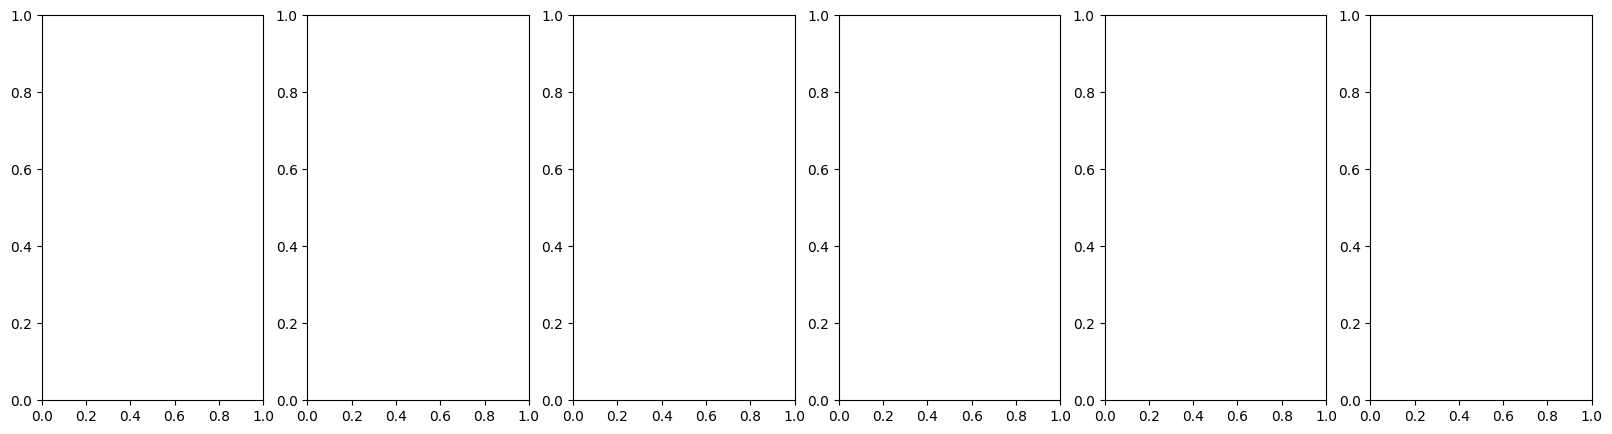

In [16]:
%%time
images_to_plot = [435873, 23657, 436051, 42668, 431471, 435909]
plot_selected_images(images_to_plot)